# **Project Name**    -



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -** Akshit Singh
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Airbnb, Inc is an American company operating an online marketplace for short-and-long-term homestays and experiences in various countries and regions. It acts as a broker and charges a commission from each booking. Today, Airbnb is one of the world’s largest accommodation platforms with 4.5 million places to stay in 81,000 cities. Over the last 10 years, Airbnb hosts earned more than $41bn and guests have checked into an Airbnb more than 300 million times. Airbnb looks to provide Homes business that is designed to bring the transformative benefits of local, personal and authentic travel to every type of traveler.**

#### **Define Your Business Objective?**

**Business Objective** that can be achieved with the dataset to understand pattern behind those data, to determine which neighbourhood to focus on, the price range of the most preffered host and the preferences of the room type and type of travellers taking the airbnb services. which hosts are the most reviewed and most preffered.

Stages of EDA
1.Descriptive Analysis
2.Correlation Analysis
3.Check imbalance in data

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [ ]:
# Load Dataset
df = pd.read_csv('Airbnb NYC 2019.csv', parse_dates=['last_review'])

### Dataset First View

In [ ]:
# Dataset First Look
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape
print(f'Dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

Dataset has 48895 rows and 16 columns.


### Dataset Information

In [ ]:
# Dataset Info
print("Before:\n", df.info())
#Converting the datatype for object to string and object to datetime
df['name'] = df['name'].astype('string')
df['host_name'] = df['host_name'].astype('string')
df['neighbourhood_group'] = df['neighbourhood_group'].astype('string')
df['room_type'] = df['room_type'].astype('string')
df['last_review'] = pd.to_datetime(df['last_review'], errors = 'coerce')

print("After:\n", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48879 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48874 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.drop_duplicates(inplace = True)
df.duplicated().sum() #There are no duplicate values in the dataset.

np.int64(0)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
# Replacing missing data with null values.
#df['name'].replace(3, np.nan, inplace = True)
''' name was an integer thus replacing it with null value'''

df['price'].replace(0, np.nan, inplace = True)

print(df.isnull().sum())
df.isna()
#df['price'].dropna(inplace = True)
''' Since the data has 0 reviews in number of reviews columns
it will have null values of last reviews and reviews per month columns'''

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                11
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


<ipython-input-7-2d25d857c596>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['price'].replace(0, np.nan, inplace = True)


' Since the data has 0 reviews in number of reviews columns\nit will have null values of last reviews and reviews per month columns'

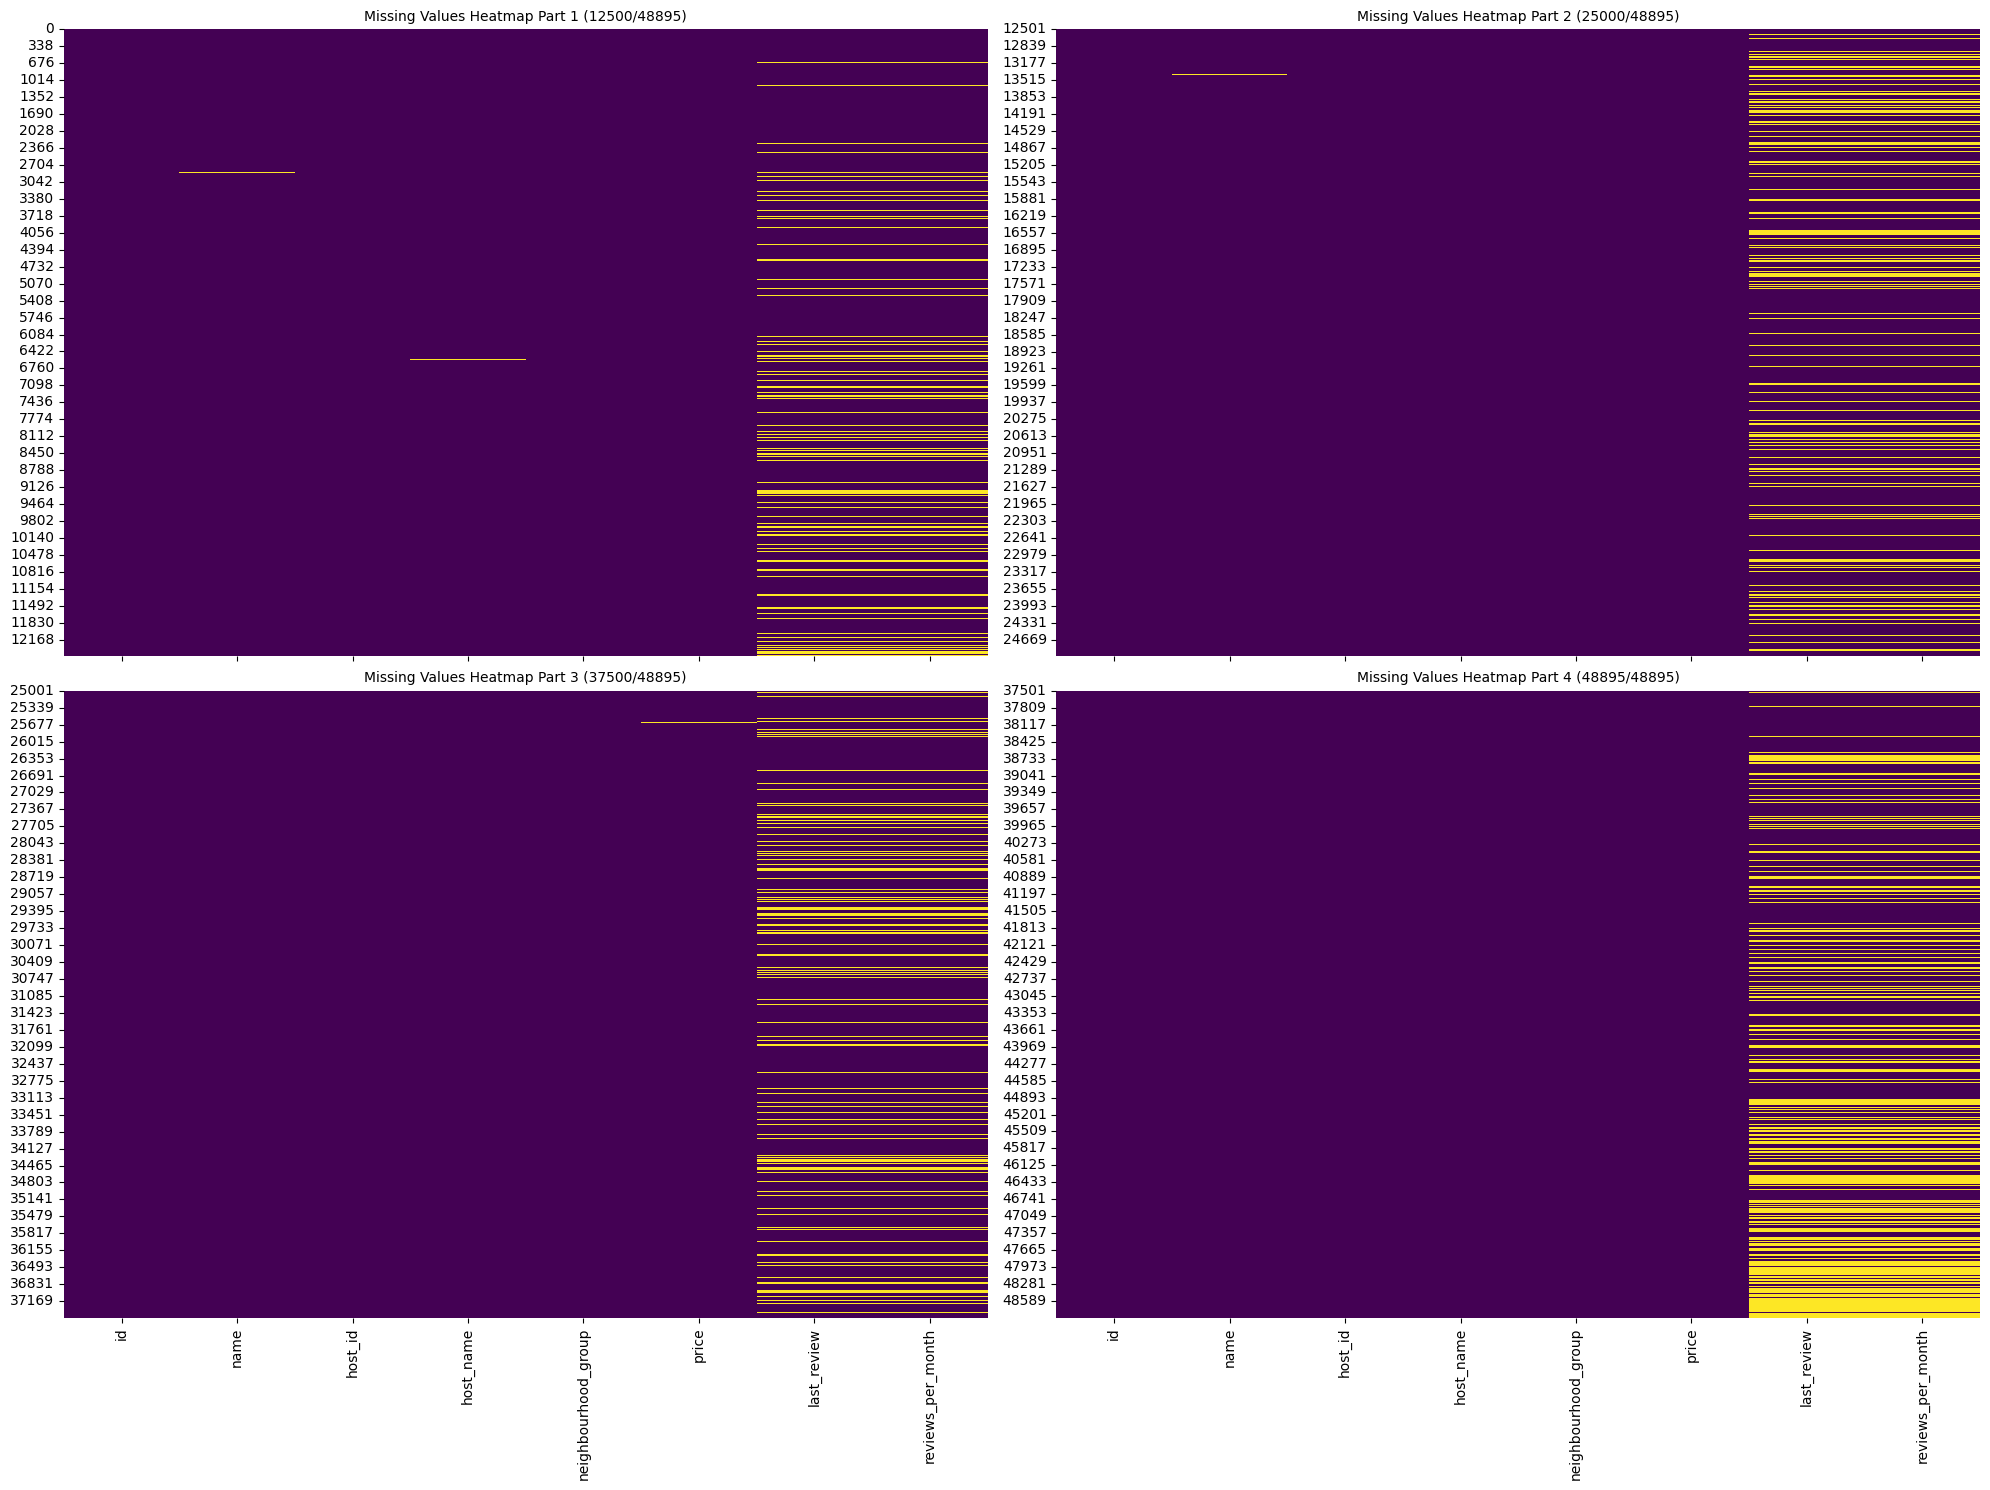

In [ ]:
# Visualizing the missing values
# Since the dataset is large we need to visualize in segments
# Making 4 subplots to accomodate all the segmented data.,'availability_365'
'''plt.figure(figsize = (8,6))
sns.heatmap(df.loc[:6250, ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'price', 'last_review', 'reviews_per_month', 'availability_365']].isnull(), cmap = 'viridis', cbar = False, annot = False)
plt.title('Missing Values Heatmap Part 1 (6250/48895) ')

plt.figure(figsize = (8,6))
sns.heatmap(df.loc[12501:18750, ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'price', 'last_review', 'reviews_per_month']].isnull(), cmap = 'viridis', cbar = False, annot = False)
plt.title('Missing Values Heatmap Part 3 (18000/48895)')'''

fig, axs = plt.subplots(2,2, figsize = (20,15), sharex = True)
# plt.figure(figsize = (8,6))
sns.heatmap(df.loc[:12500, ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'price', 'last_review', 'reviews_per_month']].isnull(), ax = axs[0,0], cmap = 'viridis', cbar = False, annot = False)
axs[0,0].set_title('Missing Values Heatmap Part 1 (12500/48895)',fontsize = 10)



# plt.figure(figsize = (8,6))
sns.heatmap(df.loc[12501:25000, ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'price', 'last_review', 'reviews_per_month']].isnull(), ax = axs[0,1], cmap = 'viridis', cbar = False, annot = False)
axs[0,1].set_title('Missing Values Heatmap Part 2 (25000/48895)',fontsize = 10)

# plt.figure(figsize = (8,6))
sns.heatmap(df.loc[25001:37500, ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'price', 'last_review', 'reviews_per_month']].isnull(), ax = axs[1,0], cmap = 'viridis', cbar = False, annot = False)
axs[1,0].set_title('Missing Values Heatmap Part 3 (37500/48895)',fontsize = 10)

# plt.figure(figsize = (8,6))
sns.heatmap(df.loc[37501:, ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'price', 'last_review', 'reviews_per_month']].isnull(), ax = axs[1,1], cmap = 'viridis', cbar = False, annot = False)
axs[1,1].set_title('Missing Values Heatmap Part 4 (48895/48895)',fontsize = 10)

plt.tight_layout()


### What did you know about your dataset?

in the dataset we can see that that in the given dataset:

**id**, **name**, **host_name**, **price** Columns are having a few missing values which can be dropped as they constitute less than 5% of the total data.

**last_review**, **reviews_per_month** Columns are having missing values more than 5% of the total data these 2 data are related to **number_of_reviews** columns as 0 number of reviews will have null data in the above 2 columns. Hence, null data cannot be dropped in these 2 columns.

**neighbourhood_group**, **neighbourhood**, **latitude**,**longitude** Columns contain categorical data and dont contain null values. They are location based data of the host.

**minimum_nights**, **calculated_host_listing_count**, **availability_365** Columns contain non null categorical data.


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
list(df.columns)

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [ ]:
# Dataset Describe
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48884.000000,48895.000000,48895.000000,38843,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.755053,7.029962,23.274466,2018-10-04 01:47:23.910099456,1.373221,7.143982,112.781327
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,2011-03-28 00:00:00,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,2018-07-08 00:00:00,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,2019-05-19 00:00:00,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2019-06-23 00:00:00,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,2019-07-08 00:00:00,58.500000,327.000000,365.000000
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.170260,20.510550,44.550582,NaN,1.680442,32.952519,131.622289


### Variables Description

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

,0
id,48895
name,47896
host_id,37457
host_name,11452
neighbourhood_group,5
neighbourhood,221
latitude,19048
longitude,14718
room_type,3
price,673


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
def affordability(a):
  if a <= 100:
    return 'economical'
  if (a >100) and (a <= 300):
    return 'mid priced'
  if a > 300:
    return 'luxury'
print(' Before: \n')
print(df.head(2))

def classification(a):
  if a<=1:
    return 'transient'
  if (a > 1) and (a <= 7):
    return 'commercial'
  if (a > 7) and (a <= 28):
    return 'extended stay'
  if (a > 28) and (a <= 90):
    return 'semi residential'
  if (a > 90):
    return 'residential'

#Removing random null values.
df = df.dropna(subset = ['name', 'host_name', 'price'])


#Making the string columns lowercase and stripping whitespaces.

df.loc[:,['name']] = df['name'].str.lower()
df.loc[:,['name']] = df['name'].str.strip()
df.loc[:,['host_name']] = df['host_name'].str.lower()
df.loc[:,['host_name']] = df['host_name'].str.strip()
df.loc[:,['neighbourhood_group']] = df['neighbourhood_group'].str.lower()
df.loc[:,['neighbourhood_group']] = df['neighbourhood_group'].str.strip()
df.loc[:,['neighbourhood']] = df['neighbourhood'].str.lower()
df.loc[:,['neighbourhood']] = df['neighbourhood'].str.strip()
df.loc[:,['room_type']] = df['room_type'].str.lower()
df.loc[:,['room_type']] = df['room_type'].str.strip()

#Creating new columns based on existing columns.

df['affordability'] =  df['price'].apply(affordability)
df['hotel_type'] = df['minimum_nights'].apply(classification)
df['price_per_night'] = df['price']/df['minimum_nights']
df['potential_revenue'] = df['price']*(df['availability_365']/df['minimum_nights'])
print(df[['price','affordability','hotel_type','price_per_night','potential_revenue']].head(2))

#Handling outliers using boxplots for numerical columns.

print("Max:", df['price'].max(),"Mean: ", df['price'].mean(), "Min: ", df['price'].min())
print('Max availability: ', df['availability_365'].max(), 'Mean availability: ',
      df['availability_365'].mean(), 'Min availability: ', df['availability_365'].min())

#1.price

q1 = df['price'].quantile(.25) #First Quantile
q3 = df['price'].quantile(.75) #Third Quantile
iqr = q3-q1 #Inter Quantile Range
l_bound = max(0, q1 -(1.5*iqr)) #Lower Bound
u_bound = q3 +(1.5*iqr) #Upper Bound
'''checking various values of price column'''
print(f'q1 price: {q1} \n iqr price: {iqr} \n q3 price: {q3} \n l bound price: {l_bound} \n u bound price: {u_bound}')
df_pr = df[(df['price'] >= l_bound) & (df['price'] <= u_bound)]

#sns.boxplot(x = df_pr['price'])

print('shape of df_pr: \n', df_pr.shape)

#2.availability
q1_a = df['availability_365'].quantile(.25)
q3_a = df['availability_365'].quantile(.75)
iqr_a = q3_a-q1_a
l_bound_a = max(0, q1_a - (1.5*iqr_a))
u_bound_a = q3_a + (1.5*iqr_a)
median_a = df_pr['availability_365'].median()
#checking various values of availability column
print(f'Q1 Availability: {q1_a} \n IQR: {iqr_a} \n Q3 Availability: {q3_a} \n L bound Availability: {l_bound_a} \n U bound Availability: {u_bound_a} \n Median Availability_365: {median_a}')

df_pr.loc[:,['availability_365']] = np.where((df_pr['availability_365'] < l_bound_a) | (df_pr['availability_365'] > u_bound_a) | (df_pr['availability_365'] == 0),
                                     median_a, df_pr['availability_365'])

print(df_pr.sort_values(by = 'availability_365').head(2))

#3.minimum nights
df_pr.loc[:,['minimum_nights']] = df_pr[['minimum_nights', 'availability_365']].min(axis = 1)

#sns.boxplot(x = df_pr['availability_365'])
#sns.boxplot(x = df_pr['minimum_nights'])
print('\n After: \n')
print(df.head(2))

 Before: 

     id                                name  host_id host_name  \
0  2539  Clean & quiet apt home by the park     2787      John   
1  2595               Skylit Midtown Castle     2845  Jennifer   

  neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0            Brooklyn    Kensington  40.64749  -73.97237     Private room   
1           Manhattan       Midtown  40.75362  -73.98377  Entire home/apt   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0  149.0               1                  9  2018-10-19               0.21   
1  225.0               1                 45  2019-05-21               0.38   

   calculated_host_listings_count  availability_365  
0                               6               365  
1                               2               355  
   price affordability hotel_type  price_per_night  potential_revenue
0  149.0    mid priced  transient            149.0            54385.0
1  225.0    mid price

In [ ]:
airbnb_df_cleaned = df_pr.loc[:, ['id','name','host_id','host_name','neighbourhood_group',
 'neighbourhood','latitude','longitude','room_type','price','minimum_nights','number_of_reviews',
 'last_review','reviews_per_month','calculated_host_listings_count',
 'availability_365','affordability','hotel_type','price_per_night','potential_revenue']]
airbnb_df_cleaned.to_csv('airbnb_cleaned_data.csv', index = False )

### What all manipulations have you done and insights you found?

**Cleaned Data** : removed white spaces from categorical data and made it lower case.

      1.) name
      2.) host name
      3.) neighbourhood group
      4.) neighbourhood, room type.

**Removed Null Values**: removed null values from columns having few random null values.
      
      1.) name
      2.) host name
      3.) price

**Made new columns**: made new columns for better understanding of data.    
      
      1.) affordability
      2.) hotel type
      3.) price per night
      4.) potential revenue

**Handled outliers**: removed outliers in columns which were having few outliers.
      
      1.)price
and replaced others with median values.
      
      1.) availability
      2.) minimum nights

**Insights found**:

1.) price column has less than 5% outliers thus it can be neglected.

2.) availability column had about 10% outliers thus replaced the outliers with median value

3.) minimum nights column also had more than 10% outliers including those having value more than the value of availability throughout the year thus replaced the outliers with median values

4.) when number of review column is 0 the next two columns (last reviewed and review per month) becomes null value.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [ ]:
airbnb_df_cleaned.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'affordability', 'hotel_type', 'price_per_night',
       'potential_revenue'],
      dtype='object')

#### Chart - 1

<Axes: title={'center': 'price distribution for various room types'}, xlabel='price', ylabel='Count'>

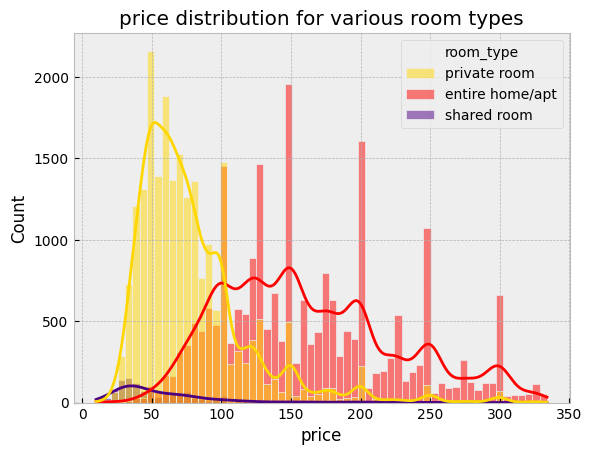

In [ ]:
# Chart - 1 visualization code
plt.style.use('bmh')
plt.title('price distribution for various room types')
sns.histplot( kde = True, x = airbnb_df_cleaned['price'], hue = airbnb_df_cleaned['room_type'], palette = ['gold', 'red', 'indigo'])

##### 1. Why did you pick the specific chart?

**Histogram** helps us in determining the **frequency of continuous data** such as price and when we further group the data into 3 parts based on room type then
the above chart helps us understand the **distribution of listing prices** according to the room types of the listings in the data.

##### 2. What is/are the insight(s) found from the chart?

from the chart above we can see that most of the rooms available in lower price range comes from **private rooms** category where as the **shared room** is less preffered in the same price range as private rooms. Also the most of medium price range and high end price range is dominated by **entire home/apt** room type.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

here we see that private rooms are having its peak at 50 and the entire home appartment has its peak at about 150 we see that there is a good margin between for the private room to improve its pricing. shared rooms need to be improved with pricing as they are priced close to the private rooms.

#### Chart - 2

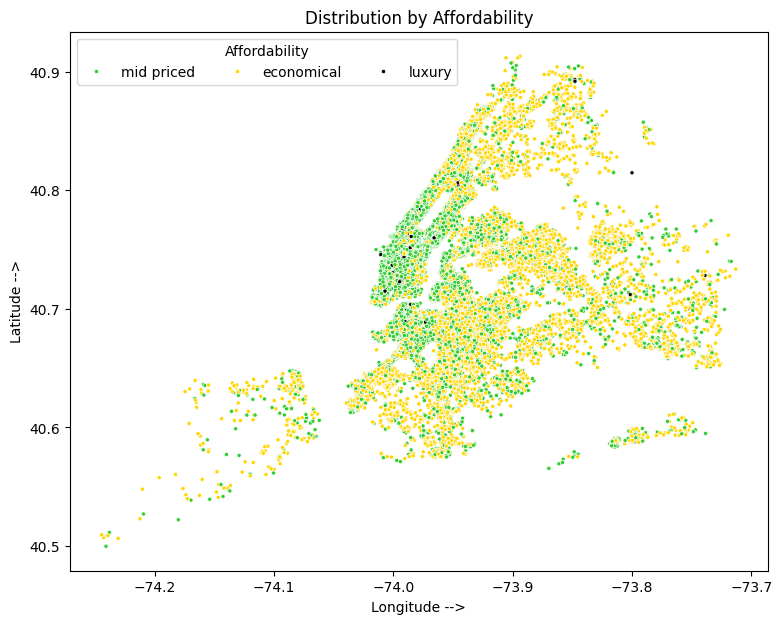

In [ ]:
# Chart - 2 visualization code
plt.style.use('default')
plt.figure(figsize = (9,7))
sns.scatterplot(data = airbnb_df_cleaned, x = 'longitude', y = 'latitude', marker = '.', hue = 'affordability', palette = ['limegreen', 'gold', 'black'] )
plt.xlabel('Longitude -->')
plt.ylabel('Latitude -->')
plt.title('Distribution by Affordability')
plt.legend(title = 'Affordability',ncol = 3, loc = 'upper left')
plt.show()

##### 1. Why did you pick the specific chart?

**Latitude vs Longitude** chart with **affordability** as hue shows spatial patterns of affordability across the city.

Lets you spot affordable vs premium clusters thus give a good understanding of the region in a better way.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals high-price or low-price zones visually.

shows that economical listings are pushed to the eastwards, while west zones are mid-priced/luxury dominated. The chart also has some blank zones which provides areas for further possibility of rental/lodging services.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The chart helps to decide where to invest based on underserved affordability bands.

Informs target pricing depending on the neighborhood and also gives a possibility of further expansion.

#### Chart - 3

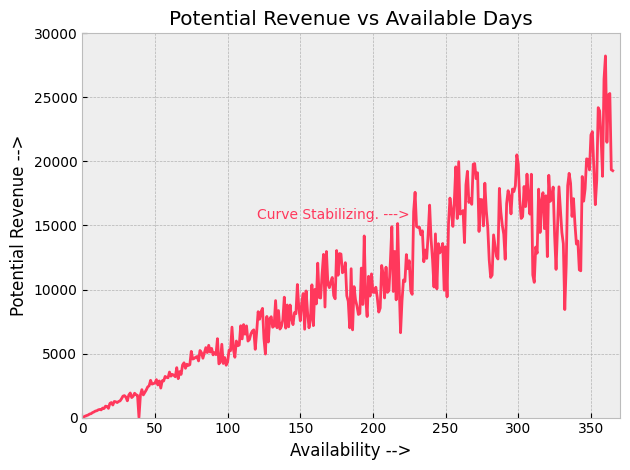

In [ ]:
# Chart - 3 visualization code
plt.style.use('bmh')
airbnb_df_cleaned.groupby('availability_365')['potential_revenue'].mean().plot(color = '#FF385C')
plt.xlabel('Availability -->')
plt.ylabel('Potential Revenue -->')
plt.title('Potential Revenue vs Available Days')
plt.xlim(0, 370)
plt.ylim(0, 30000)
plt.text(x = 120, y = 15500, s =  'revenue Stabilizing. --->', color = '#FF385C')
plt.tight_layout()

##### 1. Why did you pick the specific chart?

**Line chart** is a simple chart that helps us track how potential earnings change as availability increases. It helps us understand that the relation between the potential revenue vs availability throughout the year.

##### 2. What is/are the insight(s) found from the chart?

In the chart we can see corelation between the availability throughout the year and the potential revenue that can be achieved also shows how the revenue slowly stabilize at about 200 - 250 days and later increases at around 350 days.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

through the above chart we can select the off days more efficiently without hitting the revenue much. This can help in taking some time to improve the maintainence of location and also some repair work if needed in the year and reduce the effect on the revenue.

#### Chart - 4

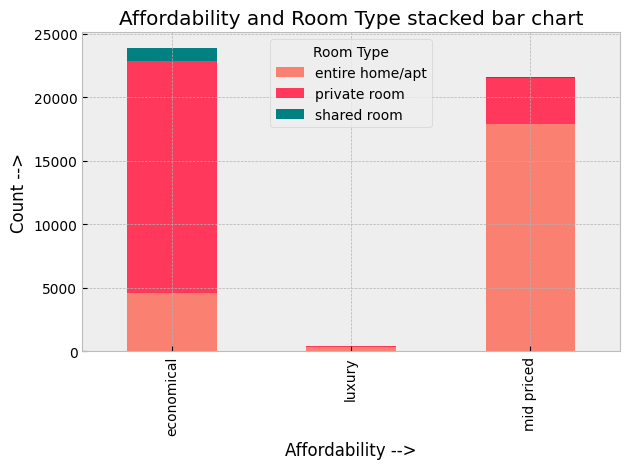

In [ ]:
# Chart - 4 visualization code
affordable= pd.crosstab(airbnb_df_cleaned['affordability'], airbnb_df_cleaned['room_type'])
affordable.plot(kind = 'bar',stacked = True, color = ['salmon', '#FF385C', 'teal'])
plt.legend(title = 'Room Type', loc = 'upper center')
plt.title('Affordability and Room Type stacked bar chart')
plt.xlabel('Affordability -->')
plt.ylabel('Count -->')
plt.tight_layout()

##### 1. Why did you pick the specific chart?

**Stacked Bar Chart** is useful in understanding the categorical and numerical data it gives a good visualization of various room types across various economic class and explores which hotel types are used with which room styles.

##### 2. What is/are the insight(s) found from the chart?

we can clearly see that economical hotels have slightly more bookings than midpriced ones. The hostings having private room occupies a good amount of share in economical hotel types and entire home/apartment comes a distant second. but in mid priced hotel types we see that entire home/apartment occupies a majority share than private room hosts.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It can help us in imporving the listing category to match customer expectations and provide such facilities for the upcoming customers. it can also help in improving the performance of facilities by giving desired room types if possible.

#### Chart - 5

(0.0, 40.0)

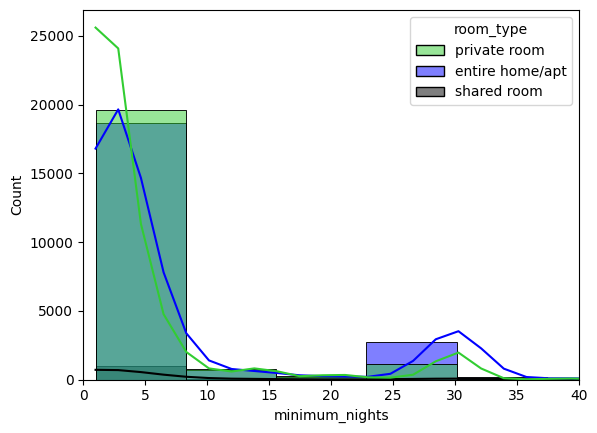

In [ ]:
# Chart - 5 visualization code
plt.style.use('default')
sns.histplot(data = airbnb_df_cleaned, x = 'minimum_nights', hue = 'room_type', kde = True, bins = 50, palette = ['limegreen', 'blue', 'black'])
plt.xlim(0,40)

##### 1. Why did you pick the specific chart?

**Histograph** shows how minimum stay requirements are set across room types.

Easy to spot how most of the listings place the minimum nights and also makes it easy to spot the outliers in the plot.

##### 2. What is/are the insight(s) found from the chart?

In the graph we can see that most hosts require 1–7 night stays, but some might force longer stays.

Shared rooms allows short stays, entire homes allow longer stays but we see a mix of both in private room stays. we can see that almost all of the hotel are covered with 30 minimum nights.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

it can help in aligning the minimum nights policy with guest expectations.

Reduces booking friction, boosts occupancy if hosts are strict with minimum nights and helps in improving efficiency of the hosts.

#### Chart - 6

Text(0.5, 1.0, 'Price distribution across various Neighbourhood Groups.')

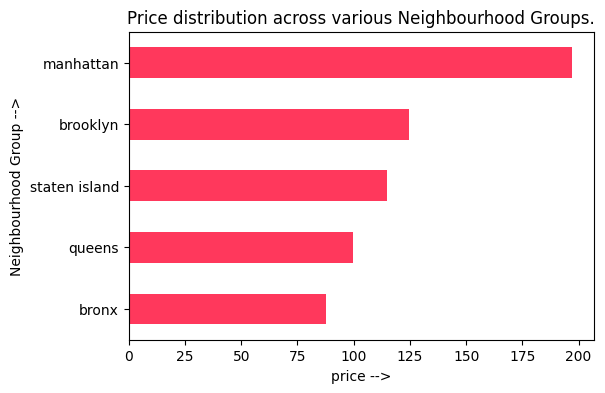

In [ ]:
# Chart - 6 visudalization code
plt.style.use('default')
plt.figure(figsize = (6,4))
avg_price = df.groupby('neighbourhood_group')['price'].mean().sort_values()
avg_price.plot(kind = 'barh', color = '#FF385C')
plt.xlabel('price -->')
plt.ylabel('Neighbourhood Group -->')
plt.title('Price distribution across various Neighbourhood Groups.')

##### 1. Why did you pick the specific chart?

**Barplot** helps us understand relationship between a categorical and continuous data. it highlights area-based pricing trends, using group averages.

it becomes easy to compare the pricing of listings across various neighbourhood groups.

##### 2. What is/are the insight(s) found from the chart?

It shows where hosts are most or least expensive on average. It gives an idea of how the prices range across various neighbourhood groups.

It helps us identify the premium zones and price-inflated areas in the city and most revenue generating neighbourhoods. also gives the idea about inexpensive neighbourhood groups and areas to focus on.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Helps the investors decide where to buy or target listings. it gives an idea about the neighbourhood to focus on and price range suitable in the particular neighbourhood. It gives a range of prices that the customer can afford in the city and is comfortable to pay for the services.

It informs dynamic pricing decisions by location and neighbourhood groups to improve the revenue of the host listings.

#### Chart - 7

(0.0, 125000.0)

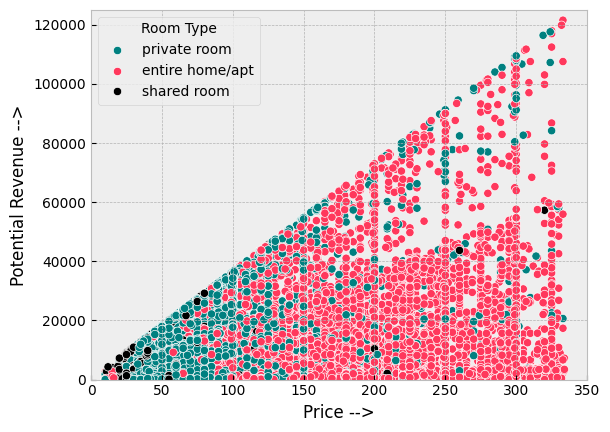

In [ ]:
# Chart - 7 visualization code
plt.style.use('bmh')
sns.scatterplot(x= 'price', y = 'potential_revenue', hue = 'room_type',
                palette = ['teal', '#FF385C', 'black'], data = airbnb_df_cleaned)
plt.legend(title = 'Room Type')
plt.xlabel('Price -->')
plt.ylabel('Potential Revenue -->')
plt.xlim(0,350)
plt.ylim(0,125000)

##### 1. Why did you pick the specific chart?

**scatter plot** helps us in determining how one numerical data is related with another numerical data. Here we draw a scatter plot between **potential revenue** and **price** of hosts.

##### 2. What is/are the insight(s) found from the chart?

we see a proportional relation between the price and potential revenue and see that as the price of host increases the potential revenue increases proportionaly and stablizing after a point.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It can help us identify if a premium pricing strategy is effective or if lower-priced options with high occupancy are more profitable.

#### Chart - 8

(0.0, 350.0)

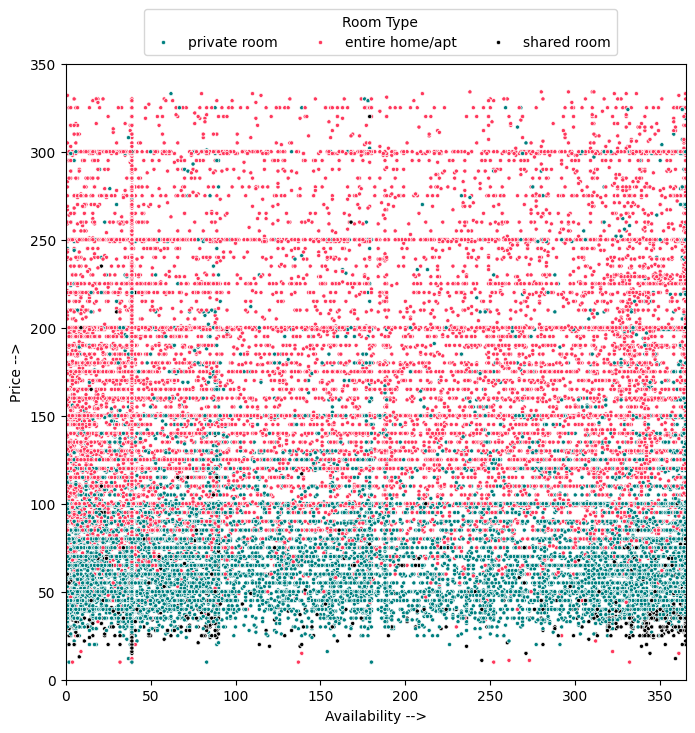

In [ ]:
# Chart - 8 visualization code
plt.style.use('default')
plt.figure(figsize = (8,8))
sns.scatterplot(x='availability_365', y='price', hue='room_type',
                palette = ['teal', '#FF385C', 'black'], data=airbnb_df_cleaned, marker = '.')
plt.legend(bbox_to_anchor = (.9,1.1), ncol = 3, title = 'Room Type')
plt.xlabel('Availability -->')
plt.ylabel('Price -->')
plt.xlim(0, 365)
plt.ylim(0,350)

##### 1. Why did you pick the specific chart?

**scatter plot** shows how two numerical values correlate with one another
 here we can see how availability correlates with pricing, across room types.

it helps us see how the various room types are available in various price range.

##### 2. What is/are the insight(s) found from the chart?

we can see that the private room listings are comparatively cheaper than entire home type listings across every availability and price range while the shared room type are the the most economical room type.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

it helps us see the availability and prices together thus informs us about the balance of supply and value.we see there is potential for better performance at 100 to 200 days availability and higher to mid price range.

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

<Axes: >

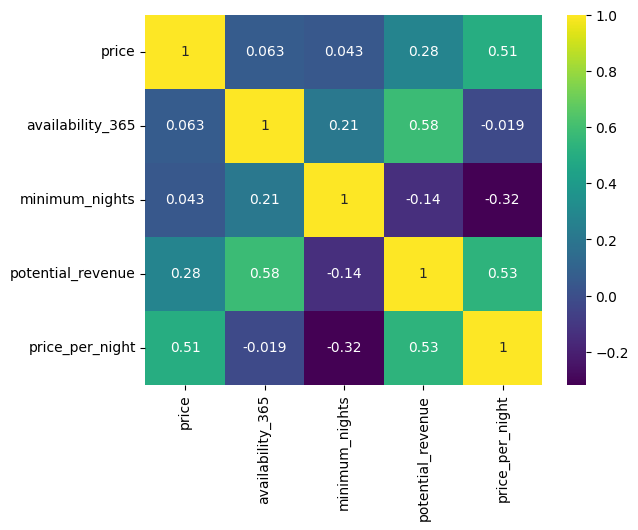

In [ ]:
# Correlation Heatmap visualization code
sns.heatmap(airbnb_df_cleaned[['price', 'availability_365', 'minimum_nights',
                'potential_revenue', 'price_per_night']].corr(), annot=True, cmap='viridis')

##### 1. Why did you pick the specific chart?

**Correlation Heatmap** helps in finding how different numerical values relate to one another it helps in finding if a value relates proportionaly or inversely. It helps in determining the relation of multiple values together.

##### 2. What is/are the insight(s) found from the chart?

minimum nights is negatively correlated with revenue, prie per night shorter stays may be more profitable.
whereas potential revenue is proportionally correlated with availability and price per night suggests that the potential revenue increases with availability and better individual prices.


#### Chart - 15 - Pair Plot

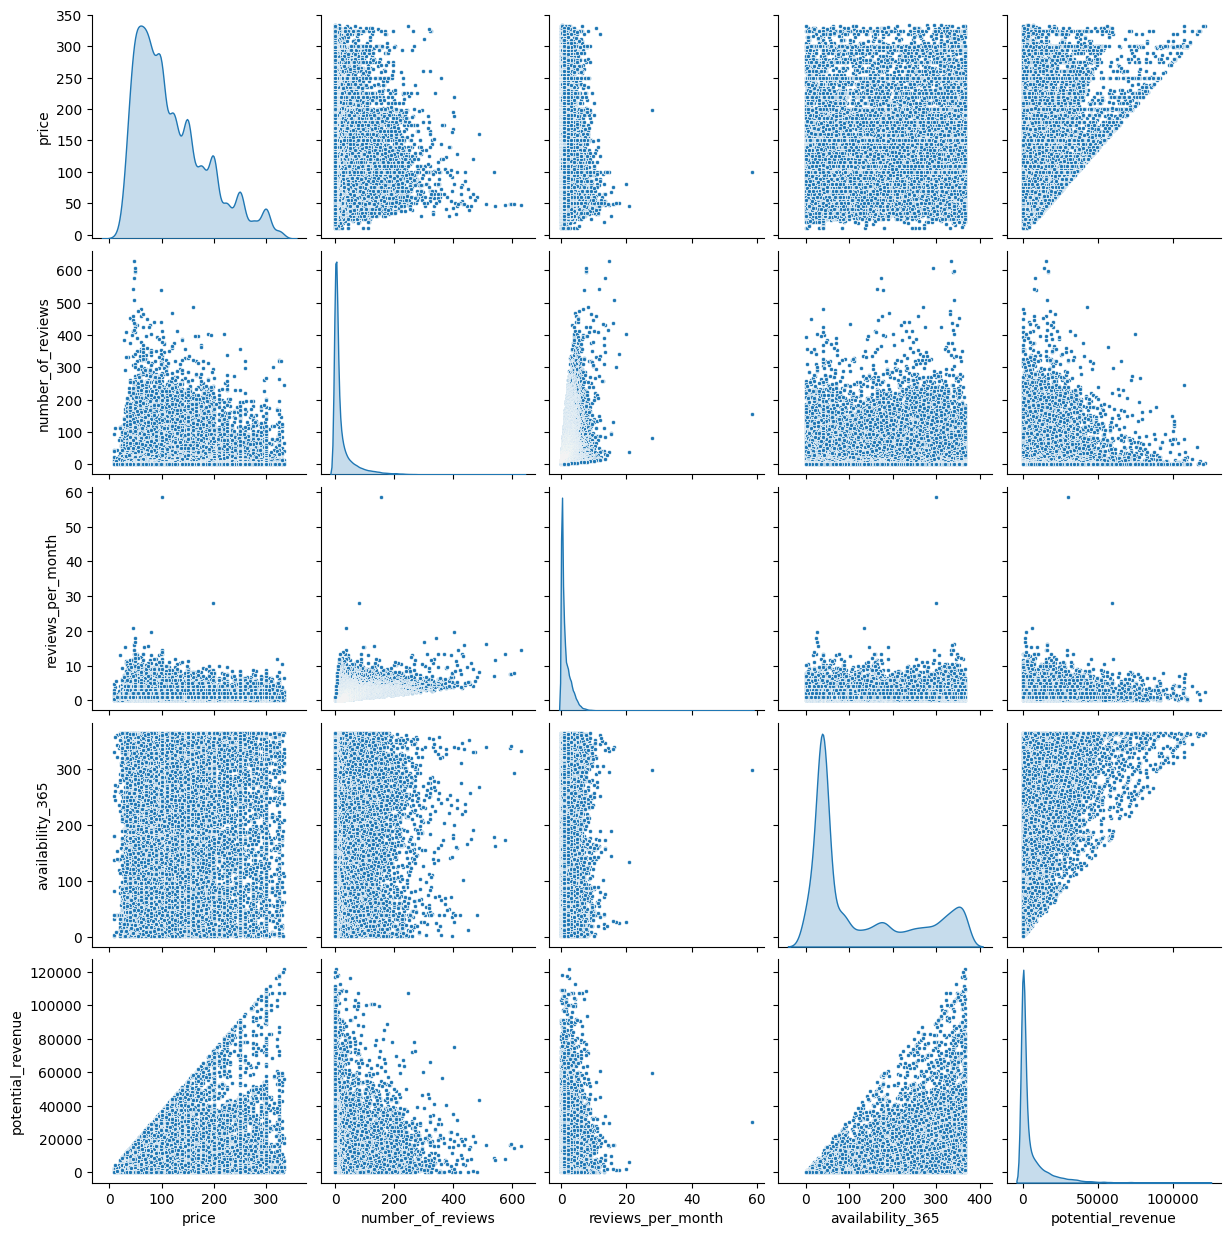

In [ ]:
# Pair Plot visualization code
sns.pairplot(airbnb_df_cleaned[['price', 'number_of_reviews', 'reviews_per_month', 'availability_365', 'potential_revenue']], diag_kind='kde', markers = '.')

##### 1. Why did you pick the specific chart?

**Pair Plot** helps in visualizing relationships between multiple variables simultaneously (e.g., price, number_of_reviews, reviews_per_month, availability_365, potential_revenue)

##### 2. What is/are the insight(s) found from the chart?

This offers a comprehensive view of pairwise relationships, which reveals interesting interactions or clusters in the data.

 it helps in feature selection for predictive modeling or in uncovering hidden patterns that could be leveraged in marketing strategies or operational improvements.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

**Expand Listing Locations**: Focus on neighborhoods groups with fewer listings but growing demand. for example Staten Islands.

**Improve Data Hygiene**: Cap minimum_nights at 30 where values exceed 365. it creates data inacuracies.

**Adopt Dynamic Pricing**: Especially in areas with high competition or seasonal traffic. For example Manhattan and Bronx

**Diversify Room Types**: Private rooms in mid-price brackets are underrepresented and shared room types also lie in mid price range which causes less bookings of shared rooms resulting in loss of revenue. Prices can be adjusted accordingly to get full potential of the bookings.

**Optimize Availability**: Avoid listings that are always available but poorly priced — it signals inefficiency. we see that the overall revenue remains considerably stable between 250-350 days so in order for improved maintainance the availability can be optimised accordingly.



# **Conclusion**

Based on the EDA, most listings are concentrated in northern and central neighbourhood groups, with "Entire home/apt" and 'private'as the dominant room type. However, many shared rooms are underutilized. Pricing strongly depends on location and room type, with higher prices in central areas. Availability is not always aligned with pricing — some listings with 300+ available days earn less than others.

With the above insights and suggestions we can expect the client to achieve the required business objective and improve the performance of the listings and provide better services to the customers and improving its revenue in future.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***